In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import glob

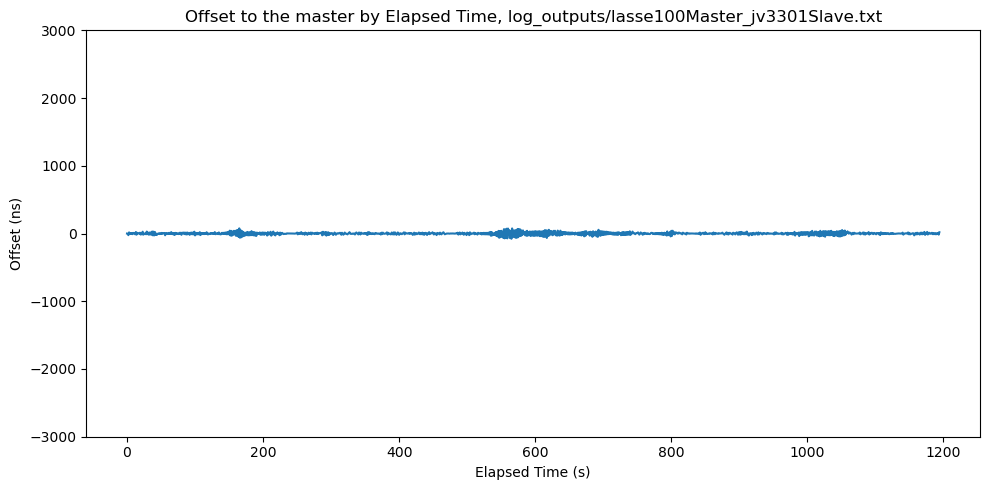

In [13]:
# Lista todos os arquivos .txt no diretório log_outputs
log_files = glob.glob('log_outputs/*.txt')

def process_log_file(log_file):
    """Processa um arquivo de log e retorna um DataFrame."""
    with open(log_file, 'r') as file:
        log_data = file.read()
    
    # Extrai os dados de offset usando expressão regular
    offset_data = re.findall(r'ptp4l\[(\d+\.\d+)\]: master offset\s+(-?\d+)', log_data)
    
    # Cria um DataFrame com as colunas apropriadas
    df = pd.DataFrame(offset_data, columns=['elapsed_time', 'offset'])
    
    # Converte as colunas para valores numéricos
    df['elapsed_time'] = pd.to_numeric(df['elapsed_time'])
    df['offset'] = pd.to_numeric(df['offset'])
    
    # Calcula a diferença de tempo entre amostras consecutivas
    df['time_difference'] = df['elapsed_time'].diff()
    
    # Ajusta a coluna 'seconds' para refletir o tempo real em segundos
    df['seconds'] = df['elapsed_time'] - df['elapsed_time'].iloc[0]
    
    return df

# Cria uma figura com subplots baseado no número de arquivos de log, um embaixo do outro
fig, axs = plt.subplots(nrows=len(log_files), ncols=1, figsize=(10, 5 * len(log_files)))

# Se houver apenas um arquivo de log, axs não será uma lista por padrão, então o convertemos para uma lista
if len(log_files) == 1:
    axs = [axs]

for i, log_file in enumerate(log_files):
    df = process_log_file(log_file)
    axs[i].plot(df['seconds'], df['offset'])
    axs[i].set(xlabel='Elapsed Time (s)', ylabel='Offset (ns)',
               title=f'Offset to the master by Elapsed Time, {log_file}')
    axs[i].set_ylim([-3000, 3000])

plt.savefig('results_plots/Offset_vertical.eps', format='eps', bbox_inches='tight')
plt.savefig('results_plots/Offset_vertical.png', format='png', bbox_inches='tight')
plt.tight_layout()
plt.show()

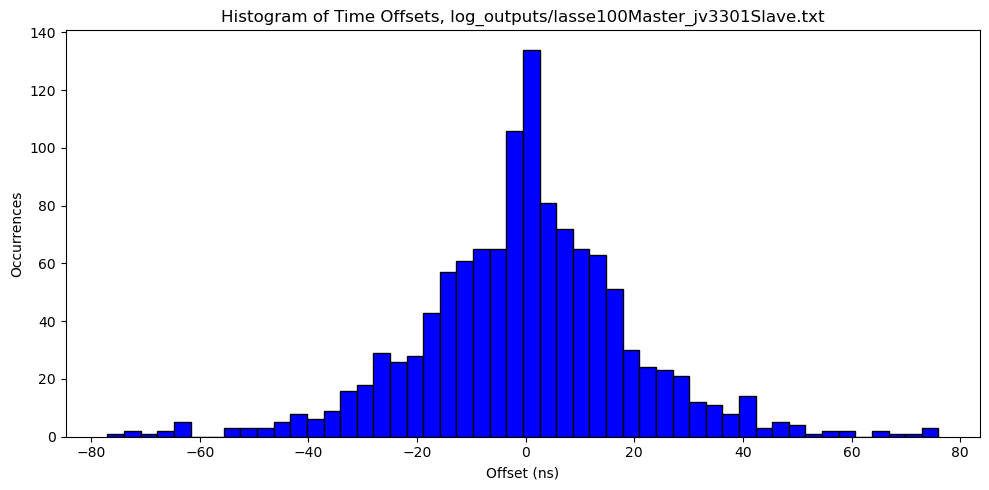

In [1]:
# Lista todos os arquivos .txt no diretório log_outputs
log_files = glob.glob('log_outputs/*.txt')

def process_log_file(log_file):
    """Processa um arquivo de log e retorna um DataFrame."""
    with open(log_file, 'r') as file:
        log_data = file.read()
    
    # Extrai os dados de offset usando expressão regular
    offset_data = re.findall(r'ptp4l\[(\d+\.\d+)\]: master offset\s+(-?\d+)', log_data)
    
    # Cria um DataFrame com as colunas apropriadas
    df = pd.DataFrame(offset_data, columns=['elapsed_time', 'offset'])
    
    # Converte as colunas para valores numéricos
    df['elapsed_time'] = pd.to_numeric(df['elapsed_time'])
    df['offset'] = pd.to_numeric(df['offset'])
    
    return df

# Cria uma figura para os histogramas
fig, axs = plt.subplots(nrows=len(log_files), ncols=1, figsize=(10, 5 * len(log_files)))

# Ajusta axs para ser sempre uma lista
axs = axs.flatten() if len(log_files) > 1 else [axs]

for i, log_file in enumerate(log_files):
    df = process_log_file(log_file)
    
    # Gera o histograma para os offsets
    axs[i].hist(df['offset'], bins=50, color='blue', edgecolor='black')
    
    axs[i].set(xlabel='Offset (ns)', ylabel='Occurrences',
               title=f'Histogram of Time Offsets, {log_files[i]}')

plt.tight_layout()
plt.savefig('results_plots/Offset_Histogram.png', format='png', bbox_inches='tight')
plt.show()

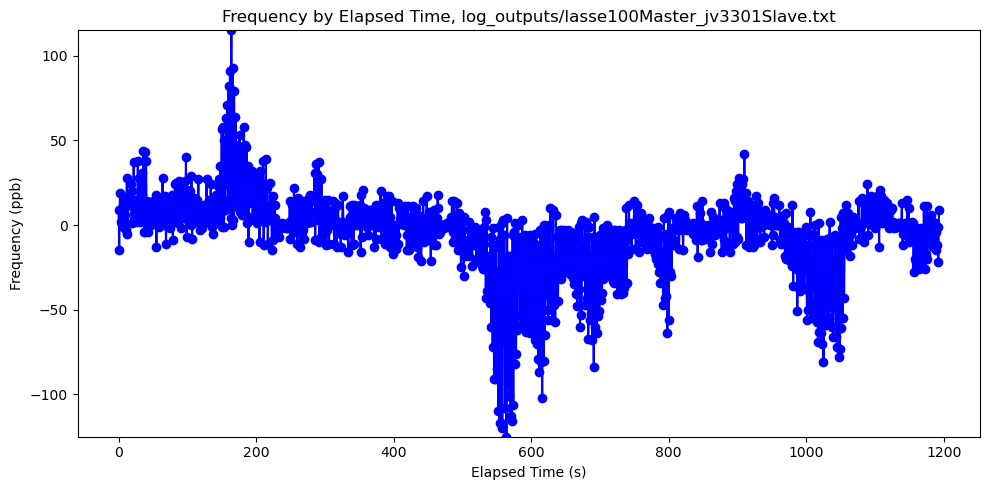

In [14]:
# Lista todos os arquivos .txt no diretório log_outputs
log_files = glob.glob('log_outputs/*.txt')

def process_log_file(log_file):
    """Processa um arquivo de log e retorna um DataFrame."""
    with open(log_file, 'r') as file:
        log_data = file.read()
    data = re.findall(r'ptp4l\[(\d+\.\d+)\]: master offset\s+(-?\d+) s2 freq\s+([+-]?\d+) path delay', log_data)
    df = pd.DataFrame(data, columns=['elapsed_time', 'offset', 'frequency'])
    df['elapsed_time'] = pd.to_numeric(df['elapsed_time'])
    df['offset'] = pd.to_numeric(df['offset'])
    df['frequency'] = pd.to_numeric(df['frequency'])
    df['seconds'] = range(0, len(df))  # Adiciona uma coluna de índice sequencial
    return df

# Processa todos os arquivos de log e armazena os DataFrames
dfs = [process_log_file(log_file) for log_file in log_files]

# Determina os limites globais para os eixos y
min_frequency = min(df['frequency'].min() for df in dfs)
max_frequency = max(df['frequency'].max() for df in dfs)

# Cria uma figura com subplots baseado no número de arquivos de log, um embaixo do outro
fig, axs = plt.subplots(nrows=len(log_files), ncols=1, figsize=(10, 5 * len(log_files)))

if len(log_files) == 1:
    axs = [axs]

for i, df in enumerate(dfs):
    axs[i].plot(df['seconds'], df['frequency'], marker='o', linestyle='-', color='blue')
    axs[i].set(xlabel='Elapsed Time (s)', ylabel='Frequency (ppb)',
               title=f'Frequency by Elapsed Time, {log_files[i]}')
    # Define os mesmos limites para todos os gráficos
    axs[i].set_ylim([min_frequency, max_frequency])

plt.savefig('results_plots/freq_vertical.eps', format='eps', bbox_inches='tight')
plt.savefig('results_plots/freq_vertical.png', format='png', bbox_inches='tight')

plt.tight_layout()
plt.show()